In [1]:
# Imports
import glob
import pandas as pd
import re
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

In [3]:
energy_profiles_df = build_dataframe(get_all_csv_filenames(data_path))
energy_profiles_df.info()
display(energy_profiles_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280320 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 10

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [4]:
# Check if there is any missing value in the datasets
print (energy_profiles_df.isnull().values.any())
energy_profiles_df.fillna(0.00)

True


,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,0.0,0.0
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,0.0,0.0
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,0.0,0.0
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,0.0,0.0
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,0.00000,0.000000,Warehouse,IL_CHICAGO-OHARE,0.0,0.0
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,0.00000,0.000000,Warehouse,IL_CHICAGO-OHARE,0.0,0.0
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,0.00000,0.000000,Warehouse,IL_CHICAGO-OHARE,0.0,0.0
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,0.00000,0.000000,Warehouse,IL_CHICAGO-OHARE,0.0,0.0


In [5]:
#Rename columns
energy_profiles_df.rename(columns={'Electricity:Facility [kW](Hourly)': 'Electric_Facility', 'Gas:Facility [kW](Hourly)': 'Gas_Facility'
                                  ,'Fans:Electricity [kW](Hourly)':'Fans_Electric_Usage','Cooling:Electricity [kW](Hourly)':'Cooling_Electric_Usage'
                                  ,'Heating:Electricity [kW](Hourly)':'Heating_Eletric_Usage','InteriorLights:Electricity [kW](Hourly)':'InteriorLights_Electric_Usage'
                                  ,'InteriorEquipment:Electricity [kW](Hourly)':'InteriorEquipe_Electric_Usage','Heating:Gas [kW](Hourly)':'Heating_Gas_Usage'
                                  ,'InteriorEquipment:Gas [kW](Hourly)':'InteriorEquipe_Gas_Usage','Water Heater:WaterSystems:Gas [kW](Hourly)':'WaterHeater_Gas_Usage'
                                  }, inplace=True)

energy_profiles_df.reset_index(drop=True, inplace=True)  #Reset index

energy_profiles_df = energy_profiles_df.drop(columns=['Electricity:Facility [kW](Monthly)','Gas:Facility [kW](Monthly)'])

In [6]:
energy_profiles_df

,Date/Time,Electric_Facility,Fans_Electric_Usage,Cooling_Electric_Usage,Heating_Eletric_Usage,InteriorLights_Electric_Usage,InteriorEquipe_Electric_Usage,Gas_Facility,Heating_Gas_Usage,InteriorEquipe_Gas_Usage,WaterHeater_Gas_Usage,building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE


In [7]:
#Save a new copy of the dataframe (This will be the main dataframe for visualization and prediction) and do some transformation

profiles_df = energy_profiles_df
profiles_df[['dayt', 'time']] = profiles_df['Date/Time'].str.split('  ', expand=True)
profiles_df[['month', 'day']] = profiles_df['dayt'].str.split('/', expand=True)
profiles_df = profiles_df.drop(columns=['dayt'])
profiles_df['Year']  = '2012'
profiles_df['date_time'] =profiles_df['Year'] +'-'+ profiles_df['month'] +'-'+ profiles_df['day']
profiles_df['datetime_series'] = pd.to_datetime(profiles_df.date_time) + pd.to_timedelta(profiles_df.time)

In [8]:
#reset index on this dataframe to datetime since a time series regression model will be used 
datetime_index = pd.DatetimeIndex(profiles_df['datetime_series'].values)

profiles_df=profiles_df.set_index(datetime_index)


In [9]:
#Convert column using label Endcoder
profiles_df['Conv_building_type']= LabelEncoder().fit_transform(profiles_df['building_type'].values) 
profiles_df['Conv_location']= LabelEncoder().fit_transform(profiles_df['location'].values) 

profiles_df.head()

,Date/Time,Electric_Facility,Fans_Electric_Usage,Cooling_Electric_Usage,Heating_Eletric_Usage,InteriorLights_Electric_Usage,InteriorEquipe_Electric_Usage,Gas_Facility,Heating_Gas_Usage,InteriorEquipe_Gas_Usage,...,building_type,location,time,month,day,Year,date_time,datetime_series,Conv_building_type,Conv_location
2012-01-01 01:00:00,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,...,FullServiceRestaurant,GA_ATLANTA,01:00:00,01,01,2012,2012- 01-01,2012-01-01 01:00:00,0,0
2012-01-01 02:00:00,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,...,FullServiceRestaurant,GA_ATLANTA,02:00:00,01,01,2012,2012- 01-01,2012-01-01 02:00:00,0,0
2012-01-01 03:00:00,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,...,FullServiceRestaurant,GA_ATLANTA,03:00:00,01,01,2012,2012- 01-01,2012-01-01 03:00:00,0,0
2012-01-01 04:00:00,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,...,FullServiceRestaurant,GA_ATLANTA,04:00:00,01,01,2012,2012- 01-01,2012-01-01 04:00:00,0,0
2012-01-01 05:00:00,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,...,FullServiceRestaurant,GA_ATLANTA,05:00:00,01,01,2012,2012- 01-01,2012-01-01 05:00:00,0,0


In [10]:
profiles_df = profiles_df.drop(columns=['Date/Time','date_time','datetime_series'])

In [11]:
profiles_df.head()

,Electric_Facility,Fans_Electric_Usage,Cooling_Electric_Usage,Heating_Eletric_Usage,InteriorLights_Electric_Usage,InteriorEquipe_Electric_Usage,Gas_Facility,Heating_Gas_Usage,InteriorEquipe_Gas_Usage,WaterHeater_Gas_Usage,building_type,location,time,month,day,Year,Conv_building_type,Conv_location
2012-01-01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,01:00:00,01,01,2012,0,0
2012-01-01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,02:00:00,01,01,2012,0,0
2012-01-01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,03:00:00,01,01,2012,0,0
2012-01-01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,04:00:00,01,01,2012,0,0
2012-01-01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,05:00:00,01,01,2012,0,0


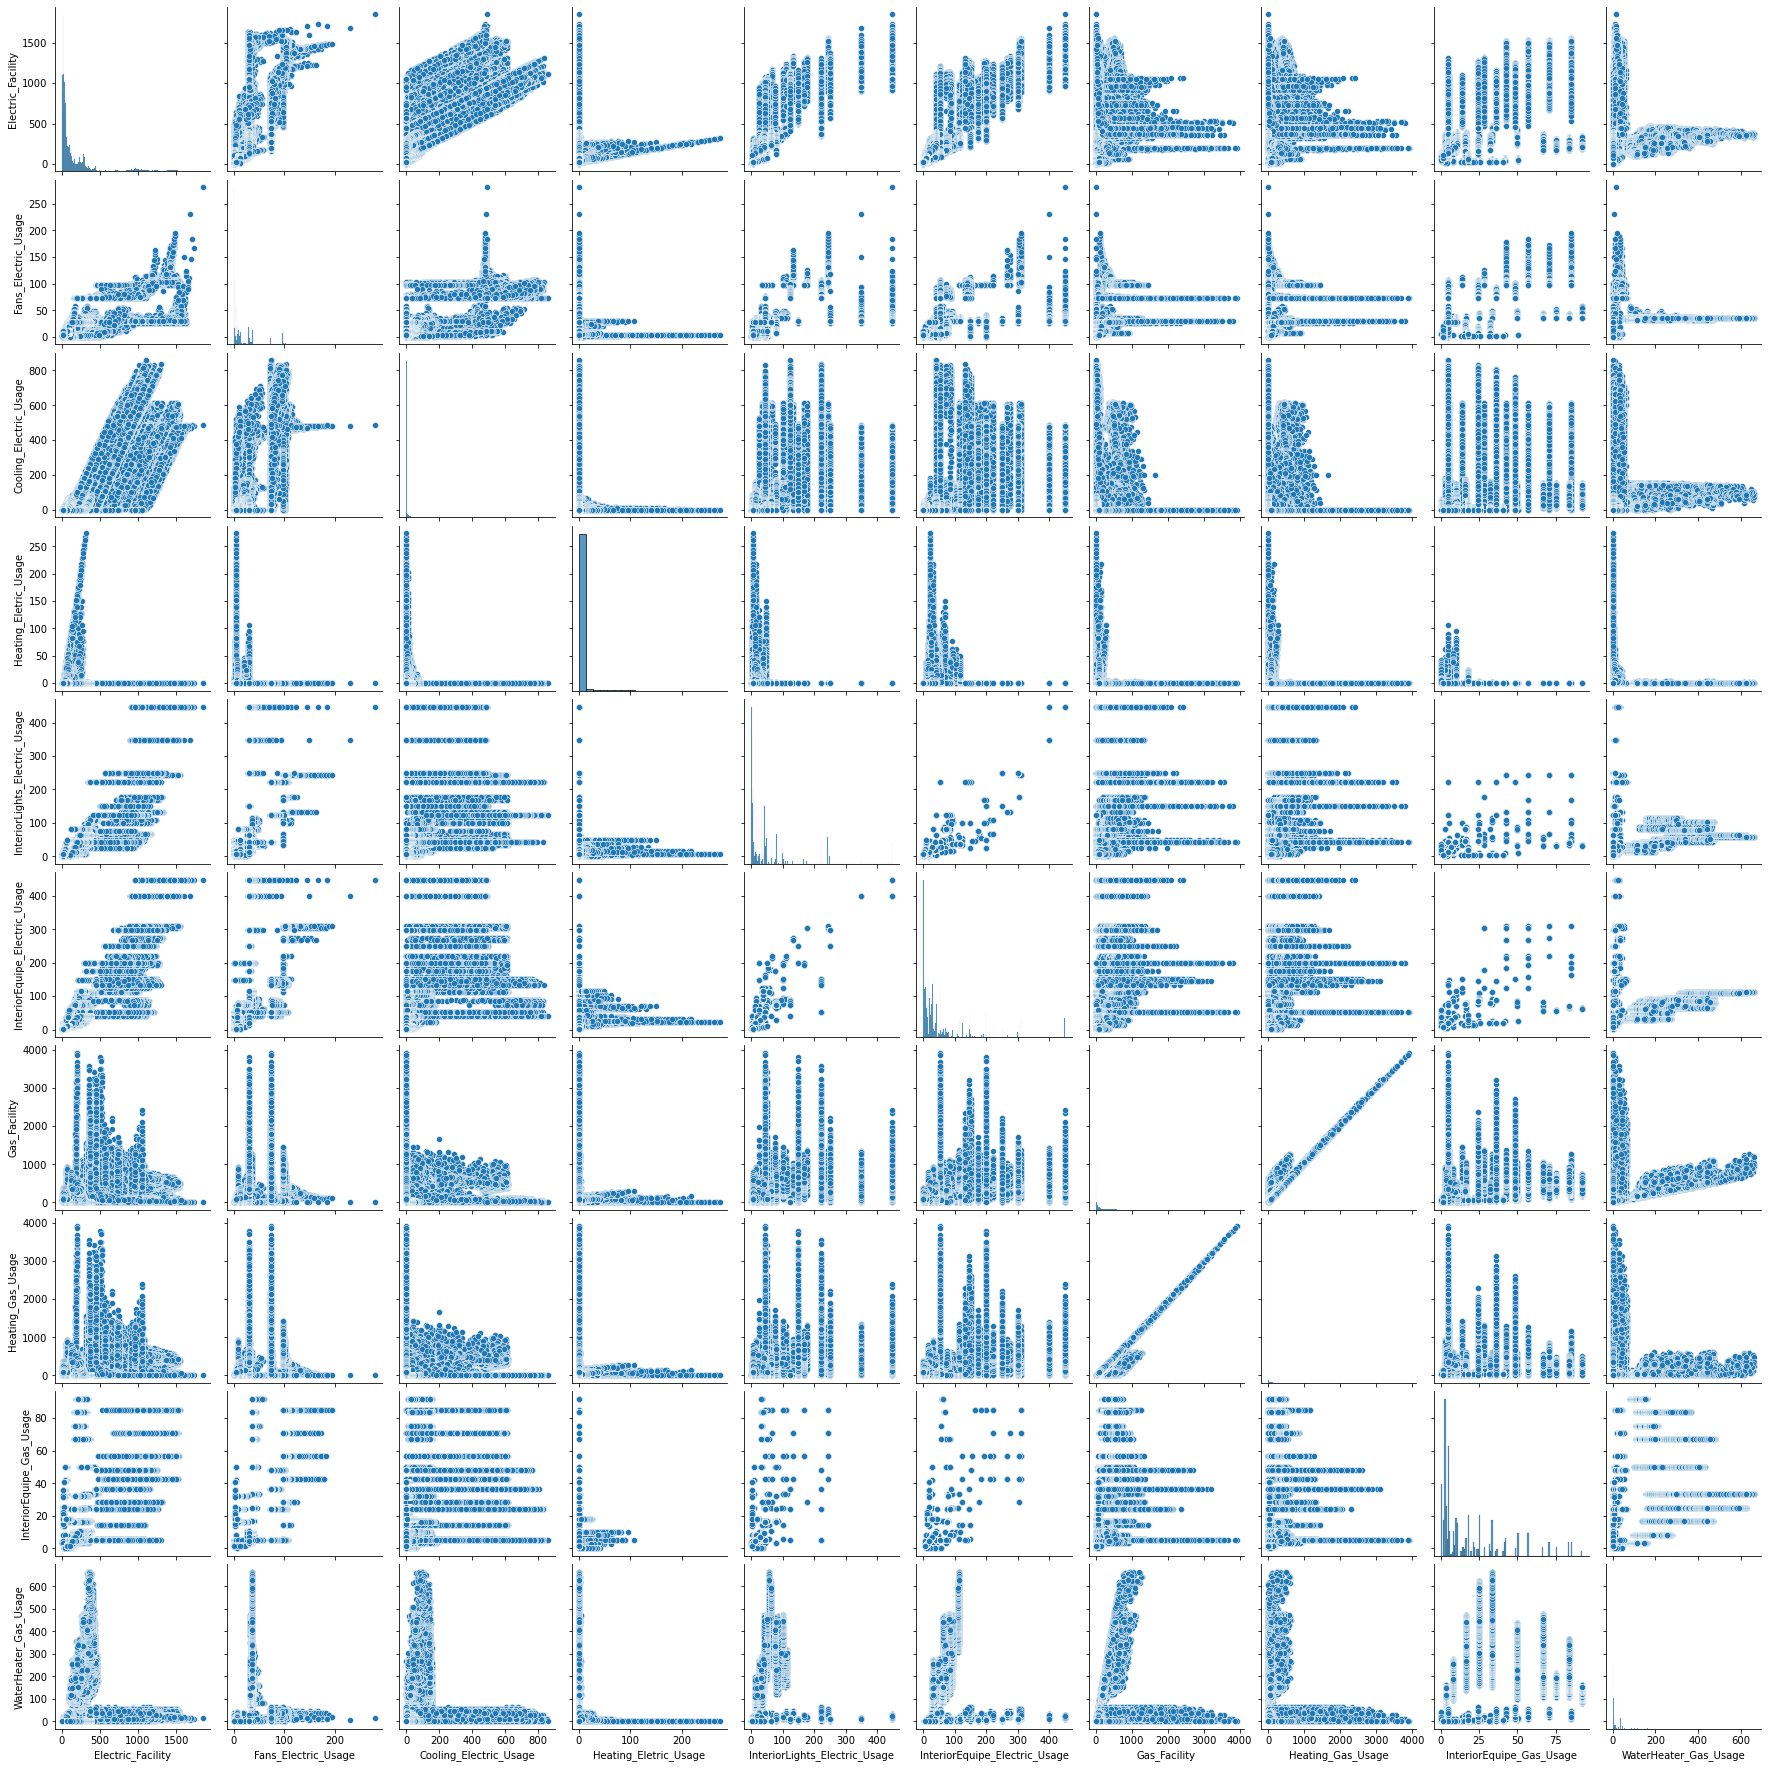

In [12]:
sns.pairplot(energy_profiles_df)
plt.show()

<AxesSubplot:>

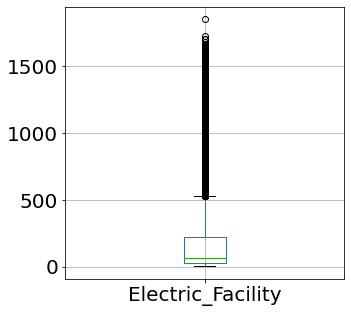

In [13]:
profiles_df.boxplot('Electric_Facility', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

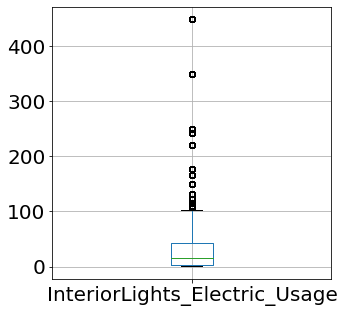

In [14]:
profiles_df.boxplot('InteriorLights_Electric_Usage', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

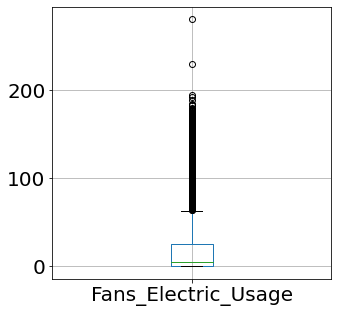

In [15]:
profiles_df.boxplot('Fans_Electric_Usage', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

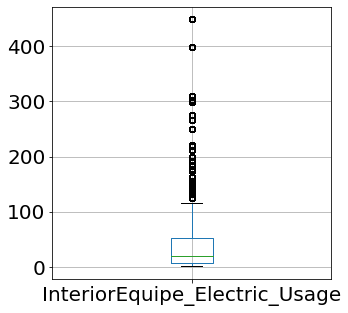

In [16]:
profiles_df.boxplot('InteriorEquipe_Electric_Usage', figsize=(5,5), fontsize= 20) 

<AxesSubplot:>

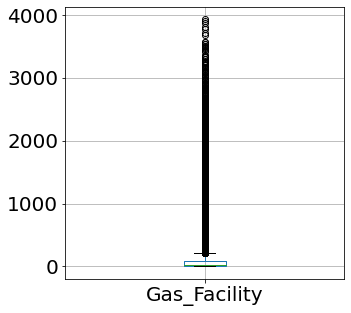

In [17]:
profiles_df.boxplot('Gas_Facility', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

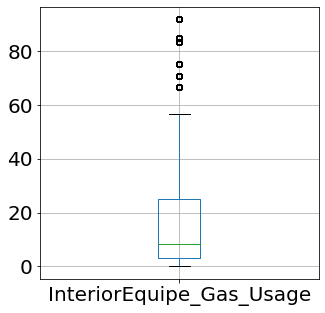

In [18]:
profiles_df.boxplot('InteriorEquipe_Gas_Usage', figsize=(5,5), fontsize= 20) 

<AxesSubplot:>

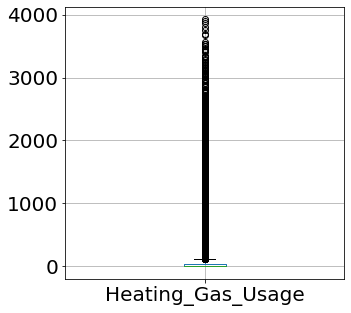

In [19]:
profiles_df.boxplot('Heating_Gas_Usage', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

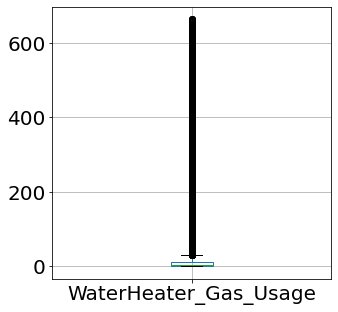

In [20]:
profiles_df.boxplot('WaterHeater_Gas_Usage', figsize=(5,5), fontsize= 20)

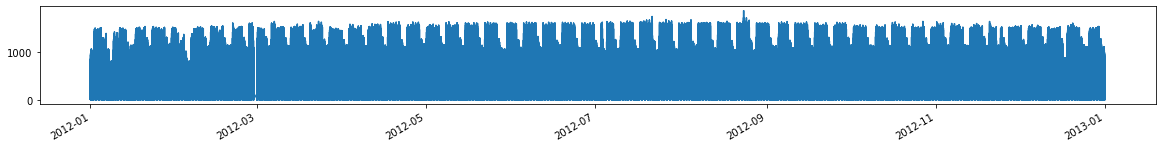

In [21]:
profiles_df.Electric_Facility.plot(figsize=(20,2));


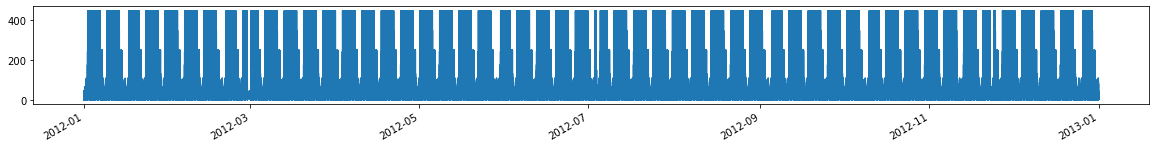

In [23]:
profiles_df.InteriorLights_Electric_Usage.plot(figsize=(20,2));

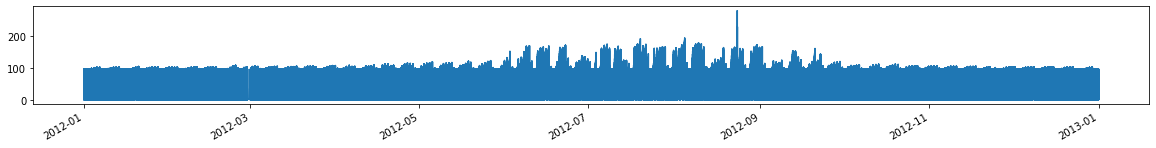

In [24]:
profiles_df.Fans_Electric_Usage.plot(figsize=(20,2));

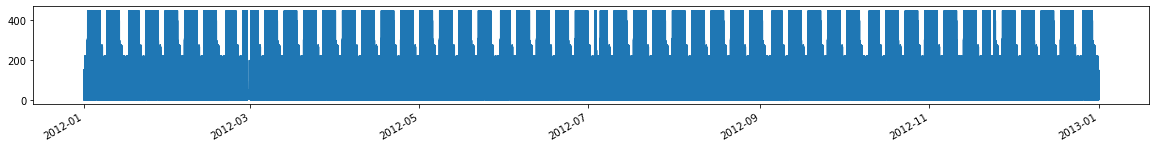

In [25]:
profiles_df.InteriorEquipe_Electric_Usage.plot(figsize=(20,2));

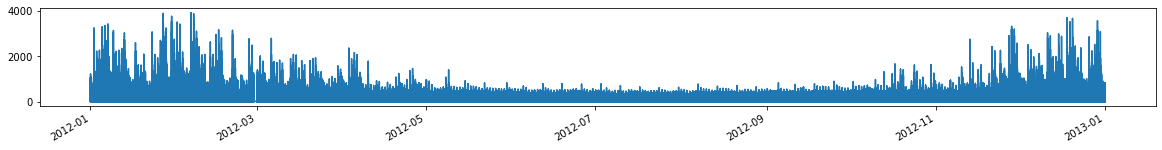

In [26]:
profiles_df.Gas_Facility.plot(figsize=(20,2));

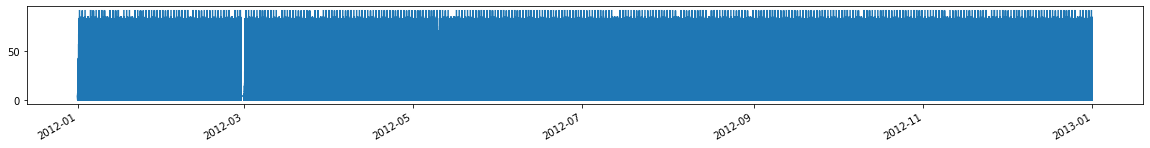

In [27]:
profiles_df.InteriorEquipe_Gas_Usage.plot(figsize=(20,2));

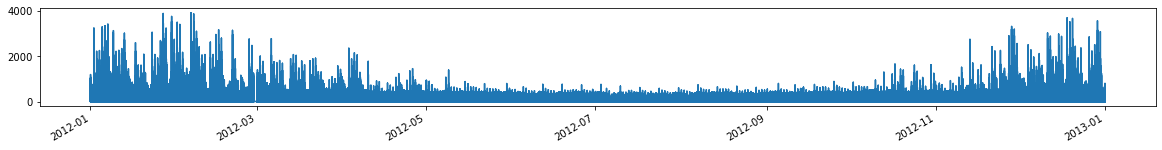

In [28]:
profiles_df.Heating_Gas_Usage.plot(figsize=(20,2));

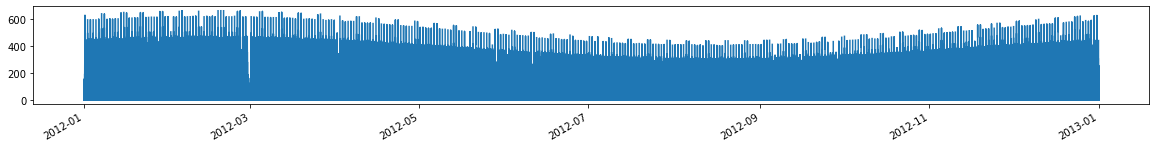

In [29]:
profiles_df.WaterHeater_Gas_Usage.plot(figsize=(20,2));

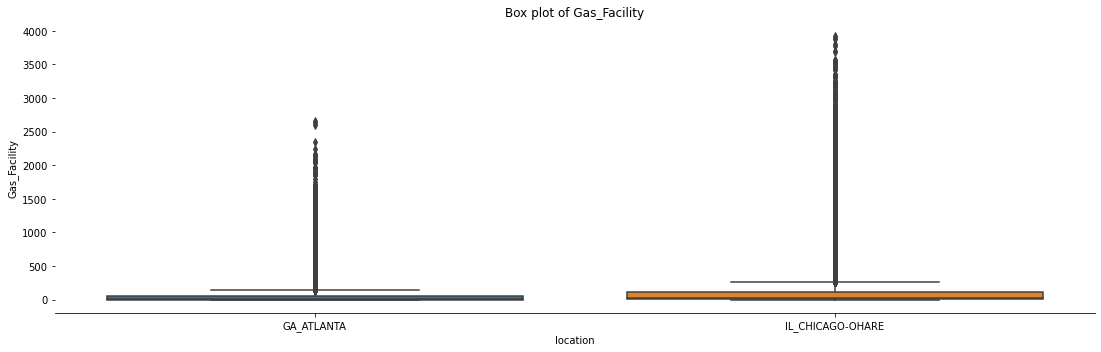

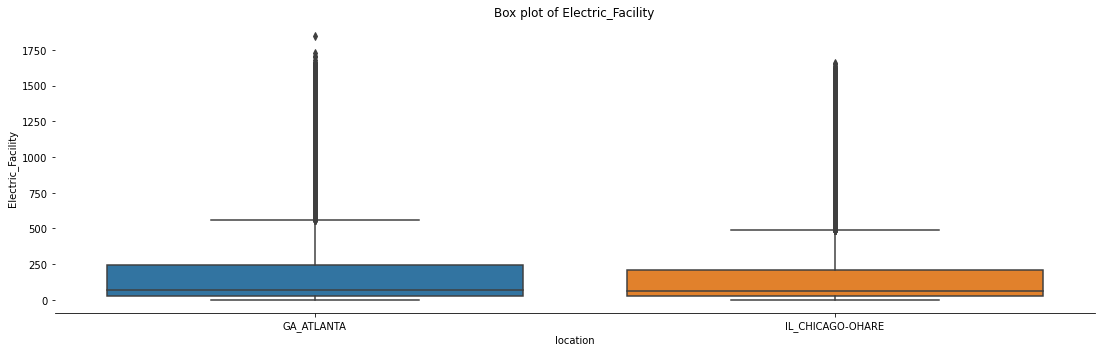

In [30]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='location', y='Gas_Facility', data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Gas_Facility')
sns.despine(left=True)
plt.tight_layout()



#Box Plot of Electricity:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x="location", y="Electric_Facility", data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Electric_Facility')
sns.despine(left=True)
plt.tight_layout()

Looks like  in consumption of gas, chicago has the higher percentage use while in Electricity, Atlanta use more

Text(0.5, 1.0, 'Mean Electric_Facility by building_type')

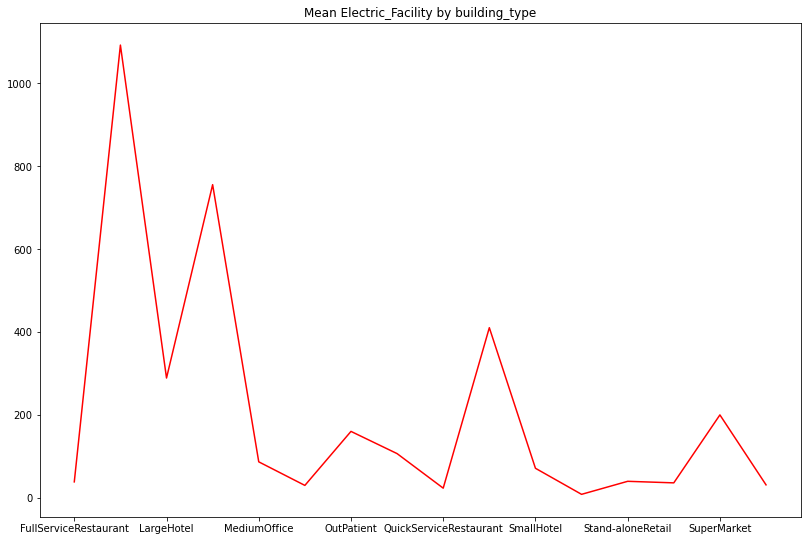

In [31]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by building_type')


Text(0.5, 1.0, 'Mean InteriorEquipe_Electric_Usage by building_type')

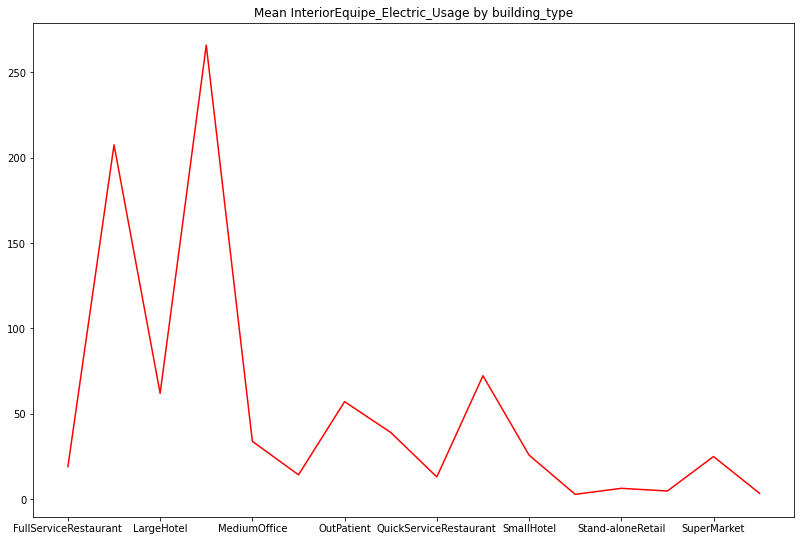

In [32]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').InteriorEquipe_Electric_Usage.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean InteriorEquipe_Electric_Usage by building_type')

Text(0.5, 1.0, 'Mean Fans_Electric_Usage by building_type')

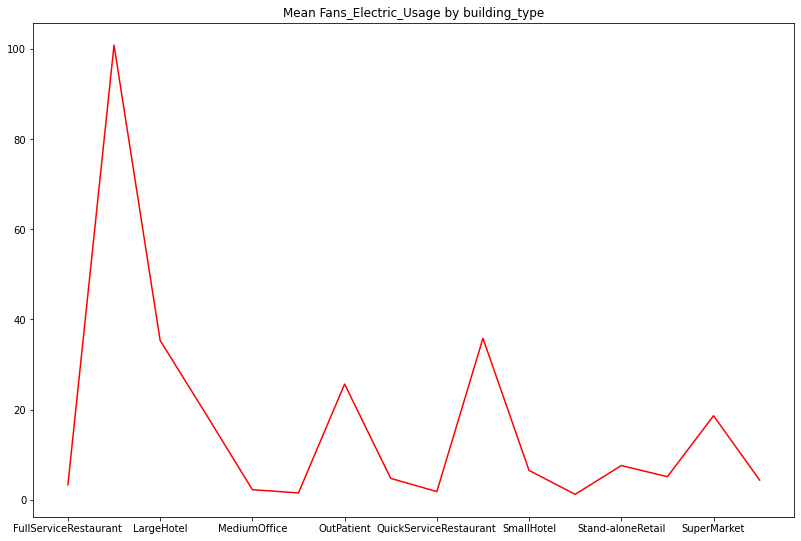

In [33]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Fans_Electric_Usage.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Fans_Electric_Usage by building_type')

Text(0.5, 1.0, 'Mean Gas_Facility by building_type')

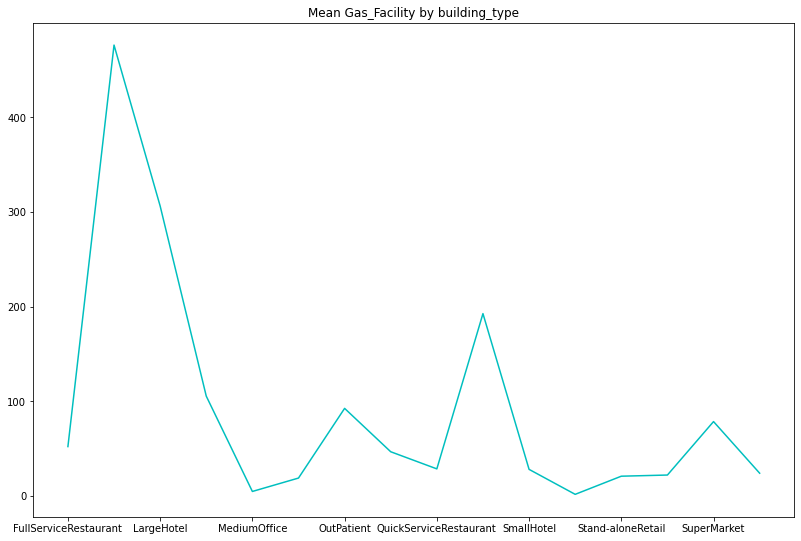

In [34]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by building_type')

Text(0.5, 1.0, 'Mean Electric_Facility by month')

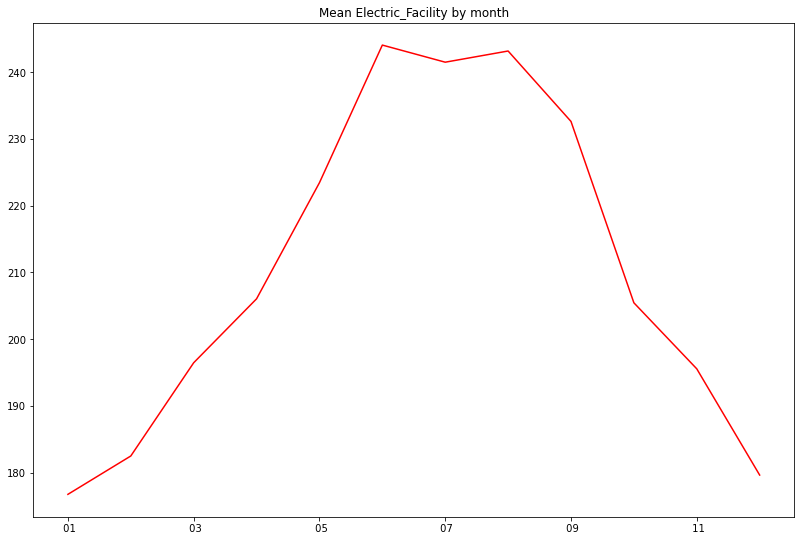

In [35]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by month')

Text(0.5, 1.0, 'Mean Electric_Facility by day')

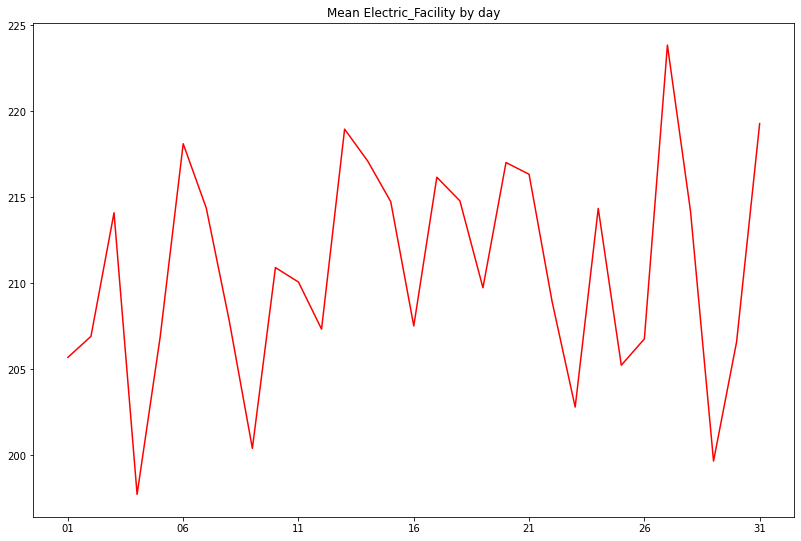

In [36]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('day').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by day')

Text(0.5, 1.0, 'Mean Gas_Facility by day')

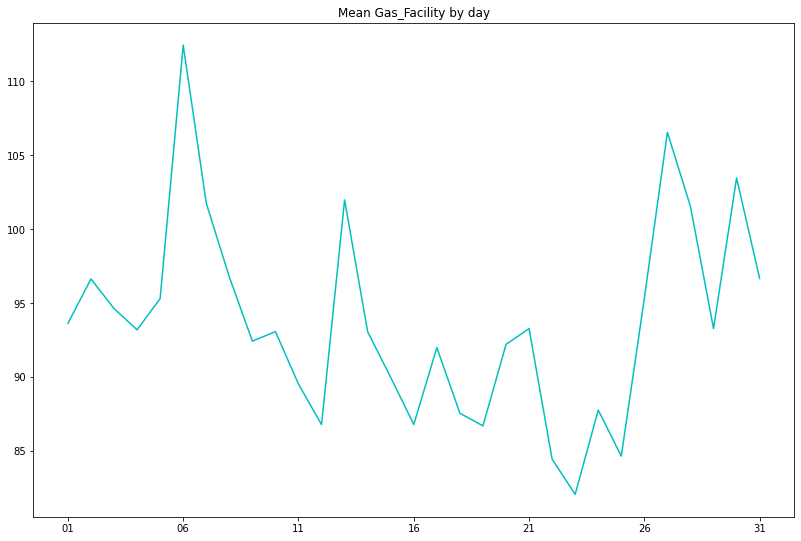

In [37]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('day').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by day')

the graph indicates that higest electricity consumption is between month May and August which implies 
 more electricity useage during summer

Text(0.5, 1.0, 'Mean Gas_Facility by month')

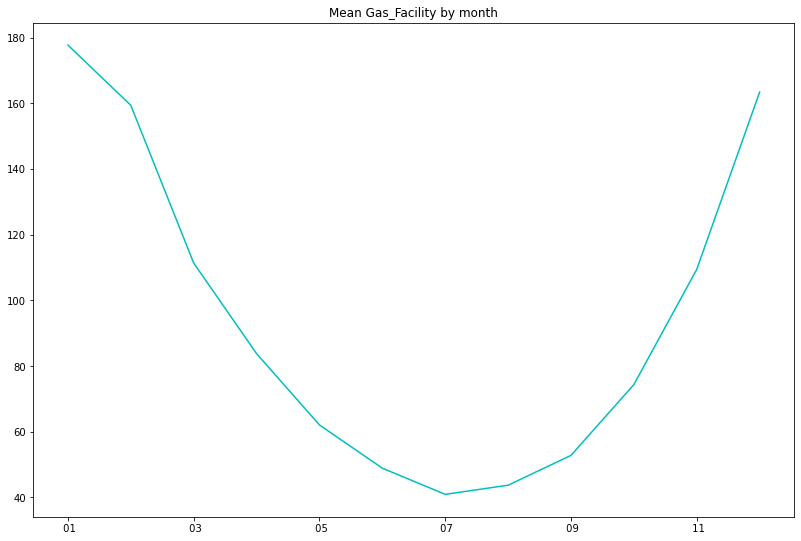

In [38]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by month')

While gas consumption is lower during summer 

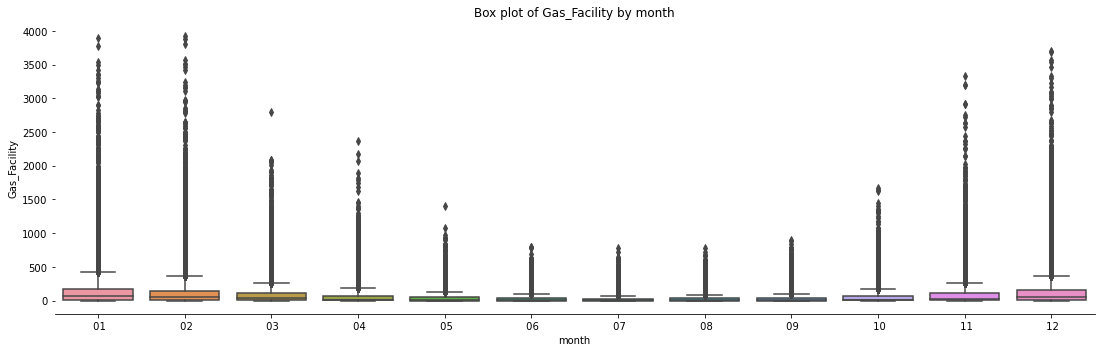

In [39]:
%matplotlib inline


#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Gas_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Gas_Facility by month')
sns.despine(left=True)
plt.tight_layout()

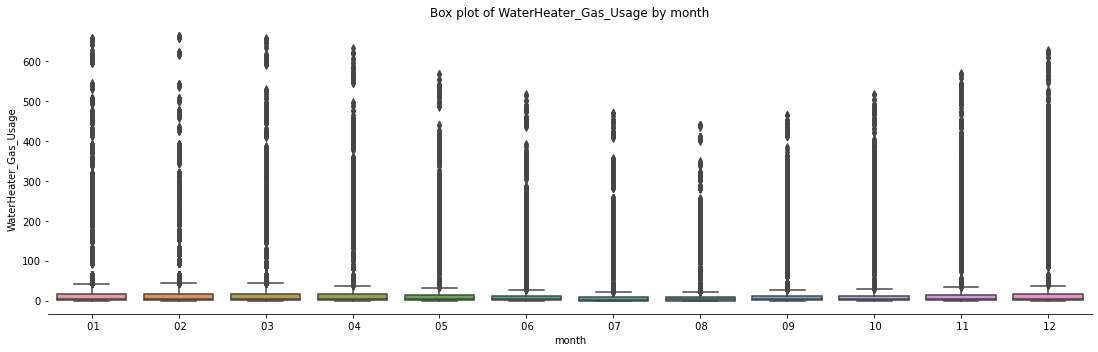

In [40]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='WaterHeater_Gas_Usage', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of WaterHeater_Gas_Usage by month')
sns.despine(left=True)
plt.tight_layout()

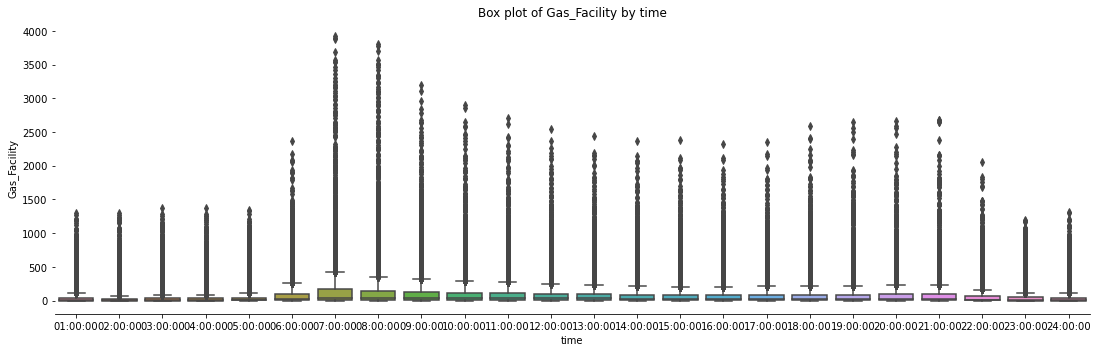

In [41]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Gas_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Gas_Facility by time')
sns.despine(left=True)
plt.tight_layout()

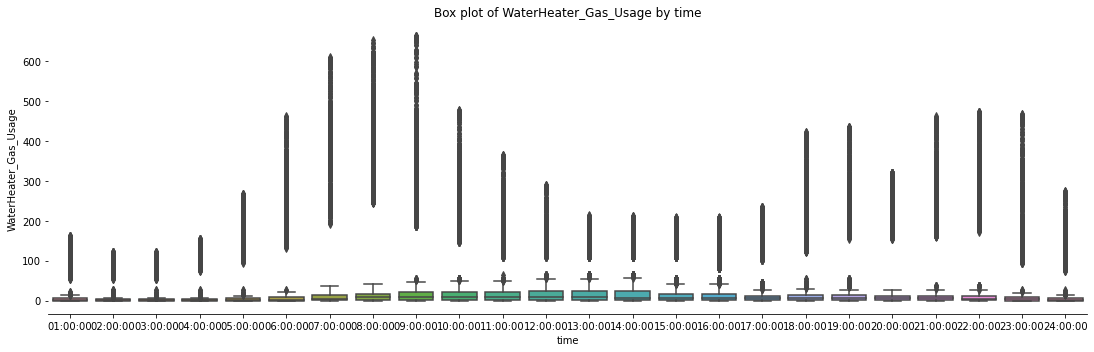

In [42]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='WaterHeater_Gas_Usage', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of WaterHeater_Gas_Usage by time')
sns.despine(left=True)
plt.tight_layout()

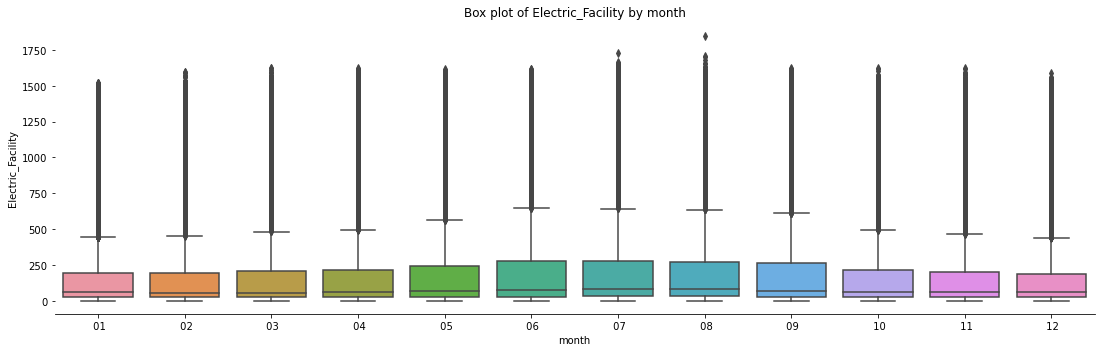

In [43]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Electric_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Electric_Facility by month')
sns.despine(left=True)
plt.tight_layout()

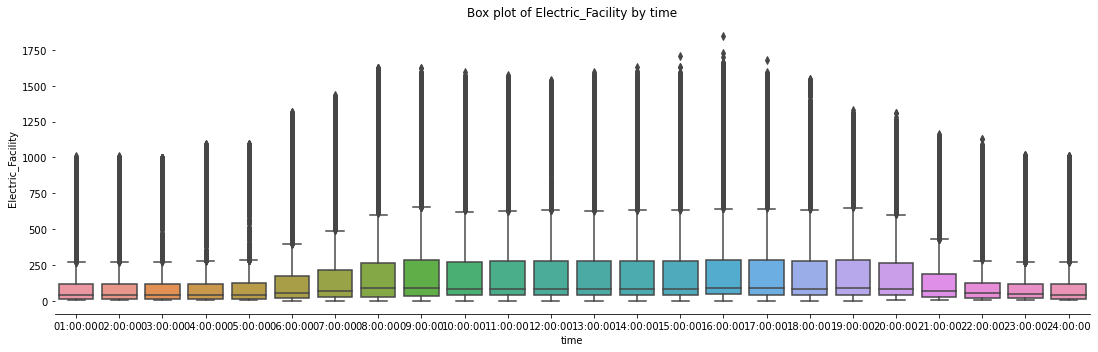

In [44]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Electric_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Electric_Facility by time')
sns.despine(left=True)
plt.tight_layout()

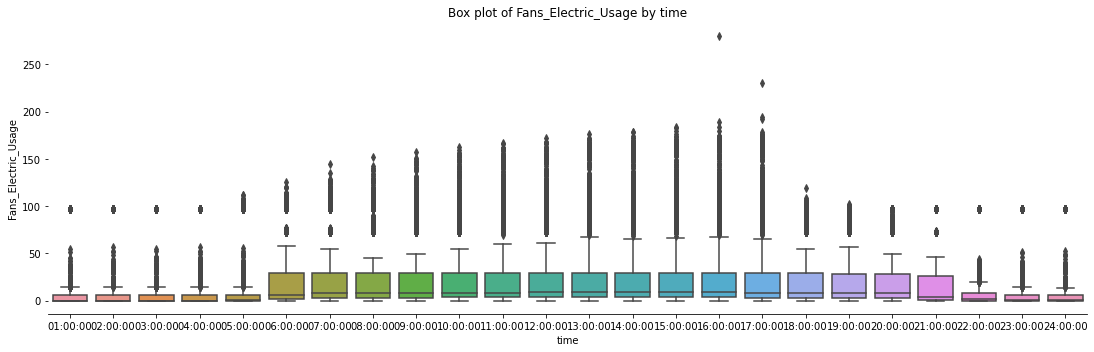

In [45]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Fans_Electric_Usage', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Fans_Electric_Usage by time')
sns.despine(left=True)
plt.tight_layout()

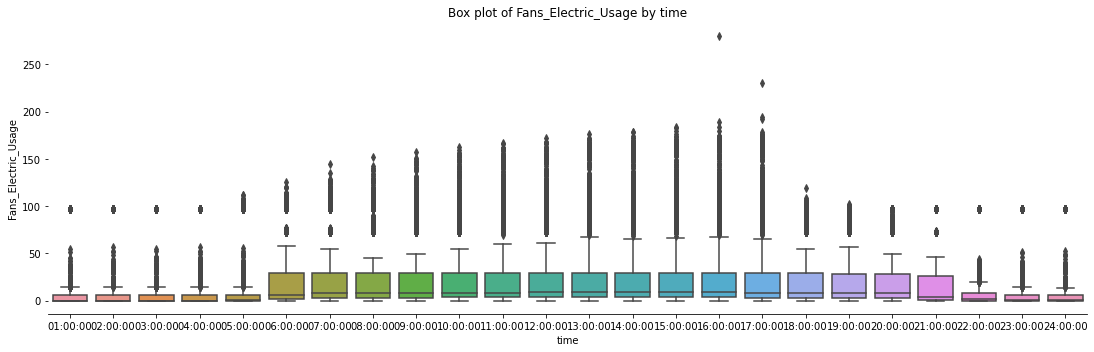

In [46]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Fans_Electric_Usage', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Fans_Electric_Usage by time')
sns.despine(left=True)
plt.tight_layout()

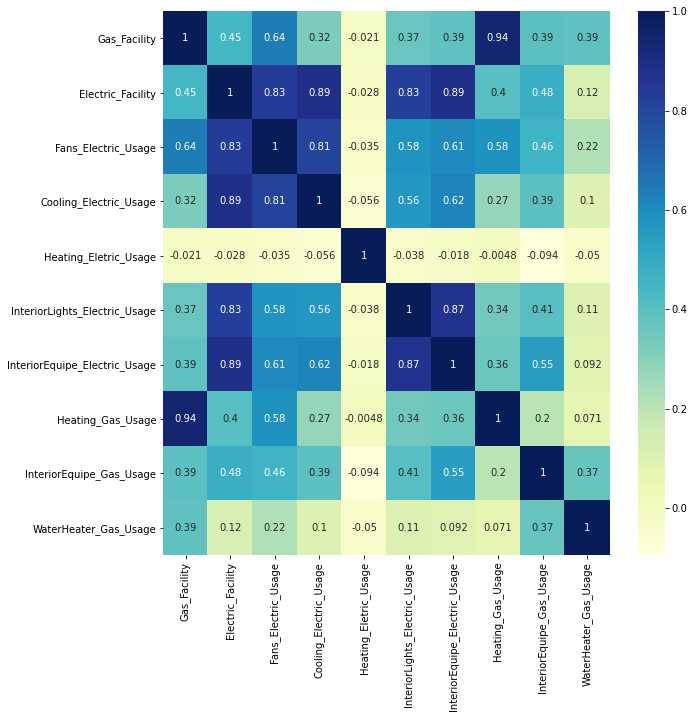

In [47]:
p = profiles_df[['Gas_Facility','Electric_Facility','Fans_Electric_Usage','Cooling_Electric_Usage','Heating_Eletric_Usage'
                 ,'InteriorLights_Electric_Usage','InteriorEquipe_Electric_Usage','Heating_Gas_Usage','InteriorEquipe_Gas_Usage'
                ,'WaterHeater_Gas_Usage']]
corr_matrix = p.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

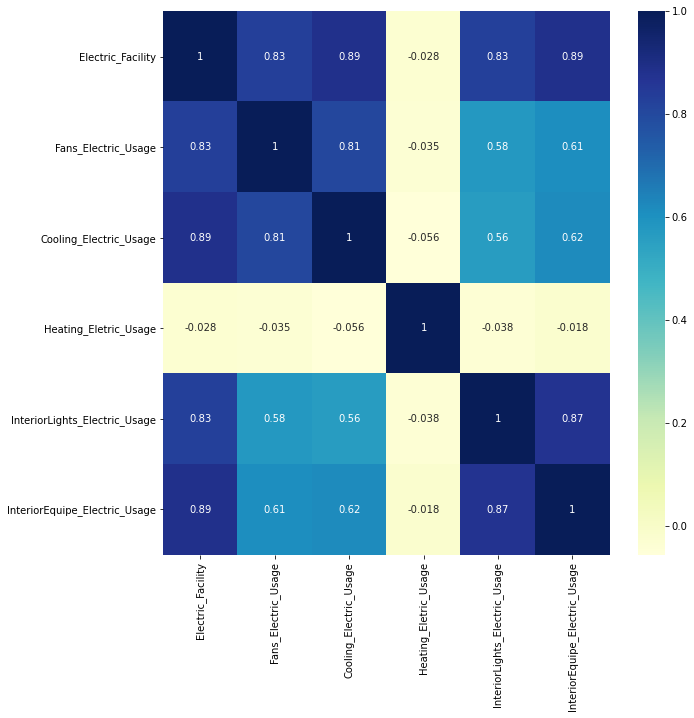

In [48]:
p = profiles_df[['Electric_Facility','Fans_Electric_Usage','Cooling_Electric_Usage','Heating_Eletric_Usage'
                 ,'InteriorLights_Electric_Usage','InteriorEquipe_Electric_Usage']]
corr_matrix = p.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

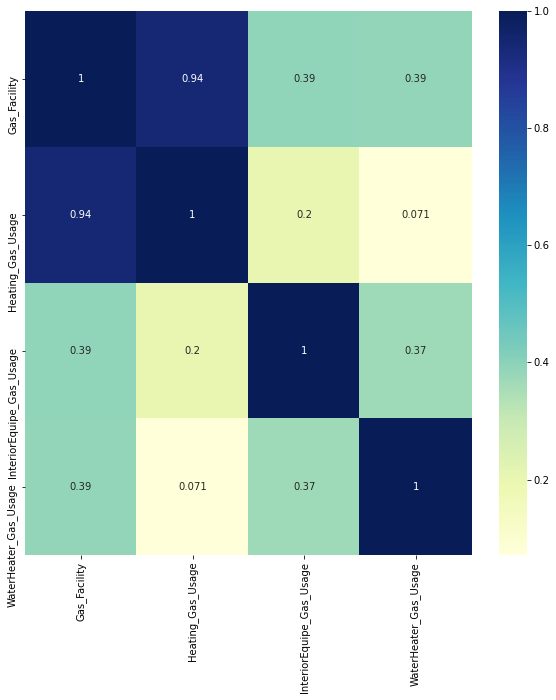

In [49]:
p = profiles_df[['Gas_Facility','Heating_Gas_Usage','InteriorEquipe_Gas_Usage'
                ,'WaterHeater_Gas_Usage']]
corr_matrix = p.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [50]:
#Get Total Energy consumption
profiles_df['Sum_Energy_Cons'] = profiles_df['Fans_Electric_Usage'] + profiles_df['Cooling_Electric_Usage'] + profiles_df['InteriorEquipe_Electric_Usage']
+ profiles_df['InteriorLights_Electric_Usage'] + profiles_df['Heating_Eletric_Usage'] + profiles_df['Heating_Gas_Usage']
+ profiles_df['InteriorEquipe_Gas_Usage'] + profiles_df['WaterHeater_Gas_Usage']

profiles_df['Total_Energy'] = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']

profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280320 entries, 2012-01-01 01:00:00 to 2013-01-01 00:00:00
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Electric_Facility              280320 non-null  float64
 1   Fans_Electric_Usage            280320 non-null  float64
 2   Cooling_Electric_Usage         280320 non-null  float64
 3   Heating_Eletric_Usage          280320 non-null  float64
 4   InteriorLights_Electric_Usage  280320 non-null  float64
 5   InteriorEquipe_Electric_Usage  280320 non-null  float64
 6   Gas_Facility                   280320 non-null  float64
 7   Heating_Gas_Usage              280320 non-null  float64
 8   InteriorEquipe_Gas_Usage       157680 non-null  float64
 9   WaterHeater_Gas_Usage          227760 non-null  float64
 10  building_type                  280320 non-null  object 
 11  location                       280320 non-null  object 
 

In [51]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Extract the target and Features from the DataFrame
X = profiles_df[['Sum_Energy_Cons']]    
y = profiles_df['Total_Energy'] 

#X = profiles_df['day'] + profiles_df['month'] + profiles_df['Conv_location'] + profiles_df['Conv_building_type']
#y = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3) # 70% training and 30% test

X_train_shaped = X_train.values.reshape(-1, 1)
X_test_shaped = X_test.values.reshape(-1, 1)

In [52]:
from sklearn.ensemble import RandomForestRegressor

#Create a Rainforest Refressor
clf=RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200, n_jobs=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_shaped,y_train)
y_pred=clf.predict(X_test_shaped)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

#y_pred=clf.predict(X_test)

In [53]:
from sklearn import metrics
import numpy as np

print("R Square:",metrics.r2_score(y_test, y_pred))



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R Square: 0.8971468716072475
Mean Absolute Error: 72.18268907152004
Mean Squared Error: 21946.843860920468
Root Mean Squared Error: 148.14467206389998


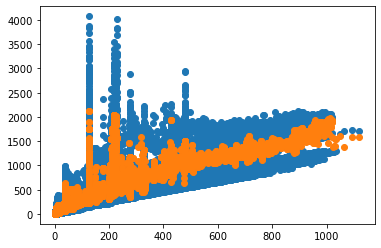

In [54]:
plt.scatter(x=X_test_shaped,y=y_test)
plt.scatter(x=X_test_shaped,y=y_pred)

In [55]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
2012-07-31 19:00:00,593.010082,552.163655
2012-07-05 13:00:00,94.107599,138.599161
2012-01-03 03:00:00,122.493517,122.775258
2012-09-13 02:00:00,38.956184,39.964814
2012-04-11 17:00:00,52.109532,59.582675
...,...,...
2012-06-17 09:00:00,776.261549,582.700887
2012-06-03 21:00:00,55.981027,54.398341
2012-07-22 19:00:00,67.347316,127.357154
2012-03-26 09:00:00,138.599361,167.923167


In [56]:
lr = LinearRegression()
lr.fit(X_train_shaped,y_train)
predictions = lr.predict(X_test_shaped)

In [57]:
from sklearn import metrics
import numpy as np

rmse = np.sqrt(metrics.mean_squared_error(predictions, y_test))
print("Root mean squared error is {:.4f}".format(rmse))


r2= metrics.r2_score(y_test, predictions)
print(r2)

Root mean squared error is 209.4554
0.794397489939719


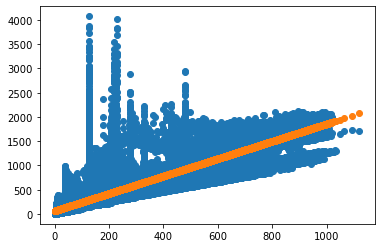

In [58]:
plt.scatter(x=X_test_shaped,y=y_test)
plt.scatter(x=X_test_shaped,y=predictions)

In [59]:
from sklearn import tree

tr_rgr = tree.DecisionTreeRegressor(random_state = 12, max_depth = 2)

tr_rgr.fit(X_train_shaped, y_train)
ypred = tr_rgr.predict(X_test_shaped)
acc = tr_rgr.score(X_test_shaped, y_test)

print("The score on the test set {}".format(acc))

The score on the test set 0.7914631840086374


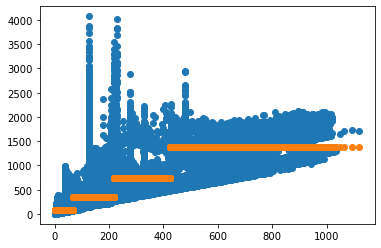

In [60]:
plt.scatter(x=X_test_shaped,y=y_test)
plt.scatter(x=X_test_shaped,y=ypred)

In [69]:
profiles_df.isnull().sum()

Electric_Facility                     0
Fans_Electric_Usage                   0
Cooling_Electric_Usage                0
Heating_Eletric_Usage                 0
InteriorLights_Electric_Usage         0
InteriorEquipe_Electric_Usage         0
Gas_Facility                          0
Heating_Gas_Usage                     0
InteriorEquipe_Gas_Usage         122640
WaterHeater_Gas_Usage             52560
building_type                         0
location                              0
time                                  0
month                                 0
day                                   0
Year                                  0
Conv_building_type                    0
Conv_location                         0
Sum_Energy_Cons                       0
Total_Energy                          0
dtype: int64

In [68]:
# Check if there is any missing value in the datasets
print (energy_profiles_df.isnull().values.any())


energy_profiles_df['InteriorEquipe_Gas_Usage'] = energy_profiles_df['InteriorEquipe_Gas_Usage'].fillna(0.00)
energy_profiles_df['WaterHeater_Gas_Usage'] = energy_profiles_df['WaterHeater_Gas_Usage'].fillna(0.00)


True


In [76]:
energy_profiles_df['InteriorEquipe_Gas_Usage'].isalpha()

AttributeError: 'Series' object has no attribute 'isalpha'

In [65]:
#Main Prediction: Adding location and building type
Xx = profiles_df[['Fans_Electric_Usage','Cooling_Electric_Usage','InteriorEquipe_Electric_Usage','InteriorLights_Electric_Usage','Heating_Eletric_Usage'
                ,'Heating_Gas_Usage','InteriorEquipe_Gas_Usage','WaterHeater_Gas_Usage','Conv_building_type','Conv_location']] 
yy = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility'] 


Xx_train, Xx_test, yy_train, yy_test = model_selection.train_test_split(Xx, yy, test_size=0.3) # 70% training and 30% test

#X_train_shaped = X_train.values.reshape(-1, 1)
#X_test_shaped = X_test.values.reshape(-1, 1)

In [66]:
#Create a Rainforest Refressor
clf=RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200, n_jobs=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xx_train,yy_train)
y_pred=clf.predict(Xx_test)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

#y_pred=clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn import metrics
import numpy as np

print("R Square:",metrics.r2_score(yy_test, yy_pred))



print('Mean Absolute Error:', metrics.mean_absolute_error(yy_test, yy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yy_test, yy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)))

In [77]:
#Extract the target and Features from the DataFrame
Xp = profiles_df[['Fans_Electric_Usage','Cooling_Electric_Usage','InteriorEquipe_Electric_Usage','InteriorLights_Electric_Usage','Heating_Eletric_Usage'
                ,'Conv_building_type','Conv_location']]   
yp = profiles_df['Electric_Facility'] 

#X = profiles_df['Fans_Electric_Usage'] + profiles_df['Cooling_Electric_Usage'] + profiles_df['InteriorEquipe_Electric_Usage'] + profiles_df['Conv_building_type']
#y = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']


# Split dataset into training set and test set
Xp_train, Xp_test, yp_train, yp_test = model_selection.train_test_split(Xp, yp, test_size=0.3) # 70% training and 30% test


In [79]:
#Create a Rainforest Refressor
clf=RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200, n_jobs=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xp_train,yp_train)
yp_pred=clf.predict(Xp_test)

print("R Square:",metrics.r2_score(yp_test, yp_pred))

R Square: 0.9990699488669499


In [80]:
lr = LinearRegression()
lr.fit(Xp_train,yp_train)
ypredictions = lr.predict(Xp_test)

r2= metrics.r2_score(yp_test, ypredictions)
print(r2)

0.9886188729370157
